# ML Coding for Bosch Production Dataset by Abdullah Saka

**Packages used: Pandas, Matplotlib, Seaborn, Sklearn, Plotly and xgBoost**

In [1]:
# import packages
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score,precision_score, recall_score,matthews_corrcoef,classification_report, confusion_matrix,plot_precision_recall_curve

# Import sample datasets

In [3]:
# show all columns or rows in pandas dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# 1.Timestamp data
#sample_date=pd.read_csv("~/bosch_iot/sample_date.csv",sep=",")
#sample_date.drop(['Unnamed: 0'],axis=1,inplace=True)
#sample_date.head()

In [4]:
#df_date=sample_date.copy()

In [5]:
# 2.Numeric data
#sample_numeric=pd.read_csv("~/bosch_iot/sample_numeric.csv",sep=",")
#sample_numeric.drop(['Unnamed: 0'],axis=1,inplace=True)
#sample_numeric.head()

In [6]:
#z=sample_numeric[sample_numeric.Response==0]

In [7]:
#z=sample_numeric.sample(frac=0.0015,random_state=12)

In [8]:
#trial=z.iloc[:,:-1]

In [9]:
#z_trans=trial.T

In [10]:
#z_trans=z_trans[1:]
#z_trans=z_trans.iloc[:,:15]

In [11]:
#import seaborn as sns
#sns.set(font_scale=1.4)

#plt.figure(figsize=(32,8))
#plt.title('Boxplot of Successful Parts', weight='bold')
#plt.xlabel("Part ID",weight='bold')
#plt.ylabel("Measurement",weight='bold')

# demonstrate how to customize the display different elements:
#boxprops = dict(linestyle='-', linewidth=2, color='r')
#medianprops = dict(linestyle='-', linewidth=2, color='r')

#sub_deneme=z_trans.copy()
#sub_deneme.boxplot(showmeans=True,boxprops=boxprops,medianprops=medianprops)
#pass

In [12]:
#df_numeric=sample_numeric.copy()

In [13]:
# check the distribution of sensors over stations
#wsx=df_numeric.T
#z=wsx.reset_index()
#a=z['index'][1:].str.split('_').str[0]
#b=z['index'][1:].str.split('_').str[1]
#c=z['index'][1:].str.split('_').str[2]
#q=pd.concat([a,b,c],axis=1)
#q=q[:-1]
#q.columns = ['line', 'station', 'sensor']
#q.groupby('line').count()

In [14]:
# check the distribution of sensors over stations
#wsx=df_date.T
#z=wsx.reset_index()
#a=z['index'][1:].str.split('_').str[0]
#b=z['index'][1:].str.split('_').str[1]
#c=z['index'][1:].str.split('_').str[2]
#q=pd.concat([a,b,c],axis=1)
#q=q[:-1]
#q.columns = ['line', 'station', 'sensor']
#q.groupby('line').count()

-----

# Timestamp Data Import

**Firstly, imported timestamp dataset and then removed observations which did not include any measurements**

In [2]:
# location of timestamp dataset in VM
path_date="~/bosch_iot/train_date.csv"

In [3]:
# import Timestamp data
def import_date(path):
    dfList = []
    df=pd.DataFrame()
    for iot_chunk in pd.read_csv(path,chunksize=100000):
        dfList.append(iot_chunk)
    df = pd.concat(dfList,sort=False)
    return df

In [4]:
# execute the import_date function 
df_org_date=import_date(path_date)

In [5]:
# remove null observations from timestamp data
df_date=df_org_date.dropna(thresh=2,axis=0)

In [6]:
pd.set_option('display.max_columns', None)
df_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [28]:
q=df_date[['Id','L0_S0_D1','L0_S0_D23','L0_S1_D26','L0_S2_D54','L0_S7_D140','L0_S8_D147','L0_S10_D226','L1_S24_D725','L2_S26_D3078','L3_S29_D3316','L3_S37_D3943']]
q.head(6)

,Id,L0_S0_D1,L0_S0_D23,L0_S1_D26,L0_S2_D54,L0_S7_D140,L0_S8_D147,L0_S10_D226,L1_S24_D725,L2_S26_D3078,L3_S29_D3316,L3_S37_D3943
0,4,82.24,82.24,82.24,82.24,82.26,82.27,NaN,NaN,NaN,87.26,87.29
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.73,1315.75
2,7,1618.70,1618.70,1618.70,1618.70,NaN,1618.73,1618.73,NaN,NaN,1624.40,1624.42
3,9,1149.20,1149.20,1149.20,1149.21,1149.22,1149.22,1149.22,NaN,NaN,1154.12,1154.16
4,11,602.64,602.64,602.64,NaN,602.67,602.67,NaN,NaN,NaN,606.00,606.02
5,13,1331.66,1331.66,1331.66,NaN,1331.68,1331.69,1331.69,NaN,NaN,1339.69,1339.73


In [20]:
# check Null values in dataframe
#pd.set_option('display.max_rows', None)
#z=pd.DataFrame(df_date.isna().sum()).sort_values(by=0,ascending=False)

-----

# Numeric Data Import

**Firstly, imported numeric dataset and then removed observations which did not include any measurements**

In [11]:
# location of numeric dataset in VM
path_numeric="~/bosch_iot/train_numeric.csv"

In [12]:
# import Numeric data
def import_data(path):
    dfList = []
    df=pd.DataFrame()
    for iot_chunk in pd.read_csv(path,chunksize=100000):
        dfList.append(iot_chunk)
    df = pd.concat(dfList,sort=False)
    return df

In [13]:
# execute the import_data function 
df_numeric=import_data(path_numeric)

In [14]:
Response=df_numeric[['Response']]

In [15]:
df_numeric.drop(['Response'],axis=1,inplace=True)

In [16]:
# remove null observations from numeric data
df_numeric=df_numeric.dropna(thresh=2,axis=0)

In [17]:
df_numeric.shape

(1183165, 969)

In [18]:
# check the ratio of failed ones among the population
6879/1183165

0.005814066508052554

In [19]:
# check first 5 observations of the dataset
df_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F1293,L1_S24_F1298,L1_S24_F1303,L1_S24_F1316,L1_S24_F1321,L1_S24_F1326,L1_S24_F1331,L1_S24_F1336,L1_S24_F1341,L1_S24_F1346,L1_S24_F1351,L1_S24_F1356,L1_S24_F1361,L1_S24_F1366,L1_S24_F1371,L1_S24_F1376,L1_S24_F1381,L1_S24_F1386,L1_S24_F1391,L1_S24_F1396,L1_S24_F1401,L1_S24_F1406,L1_S24_F1411,L1_S24_F1416,L1_S24_F1421,L1_S24_F1426,L1_S24_F1431,L1_S24_F1436,L1_S24_F1441,L1_S24_F1446,L1_S24_F1451,L1_S24_F1463,L1_S24_F1467,L1_S24_F1474,L1_S24_F1478,L1_S24_F1482,L1_S24_F1486,L1_S24_F1490,L1_S24_F1494,L1_S24_F1498,L1_S24_F1502,L1_S24_F1506,L1_S24_F1512,L1_S24_F1514,L1_S24_F1516,L1_S24_F1518,L1_S24_F1520,L1_S24_F1539,L1_S24_F1544,L1_S24_F15

------

# Sampling

**I performed sampling at the beginning because of memory complexity (data prep. with original data resulted in dead kernel)**

In [20]:
df_numeric=pd.concat([df_numeric,Response],axis=1)
df_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F1293,L1_S24_F1298,L1_S24_F1303,L1_S24_F1316,L1_S24_F1321,L1_S24_F1326,L1_S24_F1331,L1_S24_F1336,L1_S24_F1341,L1_S24_F1346,L1_S24_F1351,L1_S24_F1356,L1_S24_F1361,L1_S24_F1366,L1_S24_F1371,L1_S24_F1376,L1_S24_F1381,L1_S24_F1386,L1_S24_F1391,L1_S24_F1396,L1_S24_F1401,L1_S24_F1406,L1_S24_F1411,L1_S24_F1416,L1_S24_F1421,L1_S24_F1426,L1_S24_F1431,L1_S24_F1436,L1_S24_F1441,L1_S24_F1446,L1_S24_F1451,L1_S24_F1463,L1_S24_F1467,L1_S24_F1474,L1_S24_F1478,L1_S24_F1482,L1_S24_F1486,L1_S24_F1490,L1_S24_F1494,L1_S24_F1498,L1_S24_F1502,L1_S24_F1506,L1_S24_F1512,L1_S24_F1514,L1_S24_F1516,L1_S24_F1518,L1_S24_F1520,L1_S24_F1539,L1_S24_F1544,L1_S24_F15

In [29]:
#Z=df_numeric[['Id','L0_S0_F0','L0_S0_F22','L0_S1_F24','L0_S2_F52','L0_S7_F138','L0_S8_F146','L0_S10_F224','L1_S24_F719','L2_S26_F3077','L3_S29_F3318','L3_S37_F3944']]
#Z.head(6)

,Id,L0_S0_F0,L0_S0_F22,L0_S1_F24,L0_S2_F52,L0_S7_F138,L0_S8_F146,L0_S10_F224,L1_S24_F719,L2_S26_F3077,L3_S29_F3318,L3_S37_F3944
0,4.0,0.030,-0.273,-0.271,0.0,-0.077,0.0,NaN,NaN,NaN,-0.047,0.0
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030,0.0
2,7.0,0.088,0.250,0.057,0.0,NaN,0.0,-0.047,NaN,NaN,-0.030,0.0
3,9.0,-0.036,-0.253,0.147,0.0,0.402,0.0,-0.049,NaN,NaN,-0.139,0.0
4,11.0,-0.055,0.042,-0.012,NaN,-0.083,0.0,NaN,NaN,NaN,-0.082,0.0
5,13.0,0.003,-0.035,-0.051,NaN,0.483,0.0,-0.061,NaN,NaN,0.185,0.0


In [30]:
# distribution of failed vs success parts
df_numeric['Response'].value_counts()

0    1176868
1       6879
Name: Response, dtype: int64

In [31]:
# split the data based on Response variable
df_major=df_numeric[df_numeric.Response==0] 
df_minor=df_numeric[df_numeric.Response==1]

In [32]:
# take an sample
df_major_sample=df_major.sample(frac=0.022,random_state=21)

In [33]:
# merge two dataframes vertically
df_numericz=pd.concat([df_major_sample,df_minor])

In [34]:
# take part IDs are in the sampling
part_id=df_numericz[['Id']]

In [35]:
# reset index in the dataframe
part_id=part_id.reset_index(drop=True)
part_id.head()

,Id
0,153766.0
1,118415.0
2,161414.0
3,1154864.0
4,1993876.0


---

# Production Print

**This part explores which lines & stations & sensors the final parts have passed in the Bosch production line**

In [36]:
# create line & station points
station_list = []
first_features_in_each_station = [] 

df_date_columns = df_date.columns.tolist()

for feature in df_date_columns[1:]:
    station = feature[:feature.index('_D')]
    if station in station_list:
        continue
    else:
        station_list.append(station)
        first_features_in_each_station.append(feature)

In [37]:
global_station_pairs = {}

In [38]:
# compute production length of each part
while True:
    temp_df = pd.DataFrame (np.array(df_date[first_features_in_each_station]), columns = station_list)
    station_list_for_each_part = temp_df.stack().reset_index(level=1).groupby(level=0, sort=False)['level_1'].apply(list)
    
    temp_station_df = pd.DataFrame({"Id": np.array(df_date["Id"])})
    temp_station_df["Stations"] = station_list_for_each_part
    
    try:
        station_df = station_df.append(temp_station_df, ignore_index=True)
    except:
        station_df = pd.DataFrame({"Id": np.array(df_date["Id"])})
        station_df["Stations"] = station_list_for_each_part
    
    
    for each_part in station_list_for_each_part:
        for station_cursor in range(1, len(each_part)):
            pair = (each_part[station_cursor-1], each_part[station_cursor])
            try:
                global_station_pairs[pair] += 1
            except:
                global_station_pairs[pair] = 1
                
    try:
        df_date = next(get_df_date)
    except:
        break

**Length: I calculated how mnay stations the final parts have passed through production line.**

In [39]:
# compute cluster length of each part
station_df['Length']=station_df['Stations'].apply(lambda x:len(x))
station_df.head()

,Id,Stations,Length
0,4,"[L0_S0, L0_S1, L0_S2, L0_S4, L0_S7, L0_S8, L0_...",14
1,6,"[L0_S12, L0_S13, L0_S14, L0_S16, L0_S18, L0_S2...",13
2,7,"[L0_S0, L0_S1, L0_S2, L0_S5, L0_S6, L0_S8, L0_...",13
3,9,"[L0_S0, L0_S1, L0_S2, L0_S4, L0_S7, L0_S8, L0_...",13
4,11,"[L0_S0, L0_S1, L0_S3, L0_S4, L0_S7, L0_S8, L0_...",13


In [40]:
# take part ID and Length from station_df
cluster_len=station_df[['Id','Length']]
cluster_len.head()

,Id,Length
0,4,14
1,6,13
2,7,13
3,9,13
4,11,13


# Data Manipulation on timestamp data

In [41]:
# convert NaN to 0, numeric values to 1 (categorical variable)
def category(df):
    if df>0:
        return 1
    else:
        return 0

In [42]:
# describe min_max function to combine several dataframes
def feature_engineering(df,clus_length):
    #s32=pd.DataFrame(df['L3_S32_D3852'].apply(lambda s: category(s))).reset_index(drop=True)
    #s32=s32.rename(columns={'L3_S32_D3852':'s32'})
    
    df_z=df.drop(['Id'],axis=1) # drop Id 
    features = df_z.columns.values.tolist()
    max_stat=df_z[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    max_stat=pd.DataFrame(max_stat).reset_index(drop=True) # convert it into dataframe
    max_stat.rename(columns={0:'last_stat'},inplace=True)  # rename columns
    
    min_stat=df_z[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    min_stat=pd.DataFrame(min_stat).reset_index(drop=True) # convert it into dataframe
    min_stat.rename(columns={0:'first_stat'},inplace=True)  # rename columns
    
    date_min=pd.DataFrame(df_z.min(axis=1)).reset_index(drop=True) # convert it into dataframe
    date_min.rename(columns={0:'dt_min'},inplace=True) # rename columns
    
    date_max=pd.DataFrame(df_z.max(axis=1)).reset_index(drop=True) # convert it into dataframe
    date_max.rename(columns={0:'dt_max'},inplace=True)  # rename columns
    
    date_min_max=pd.concat([df_date['Id'],date_min,date_max,min_stat, max_stat],axis=1) # merge all dataframes vertically
    
    dt_feature=pd.merge(date_min_max,clus_length,on='Id',how='inner')
    dt_feature.rename(columns={'Flow':'length'},inplace=True) # rename columns
    
    dt_feature['Duration']=dt_feature.dt_max-dt_feature.dt_min
    
    return dt_feature

In [43]:
# execute the feature_engineering function
date_features=feature_engineering(df_date,cluster_len)

In [44]:
# took part IDs in the date_features matching with part_id dataframe
date_features_upd=part_id.merge(date_features,how='inner',on='Id')

In [45]:
# explore Production Length
date_features_upd.Length.unique()

array([16, 13, 14,  7, 17,  8, 10, 15, 20,  6, 12,  9, 11,  5, 18,  1,  2,
       21, 23,  3])

In [46]:
# quickly check date_features_upd
date_features_upd.head(7)

,Id,dt_min,dt_max,first_stat,last_stat,Length,Duration
0,153766.0,1224.77,1225.53,0.0,36.0,16,0.76
1,118415.0,1628.38,1630.24,12.0,37.0,13,1.86
2,161414.0,1225.23,1241.24,12.0,38.0,13,16.01
3,1154864.0,190.31,190.95,0.0,37.0,13,0.64
4,1993876.0,1510.60,1512.51,0.0,33.0,14,1.91
5,628365.0,1560.30,1564.19,0.0,32.0,13,3.89
6,1903305.0,676.58,683.46,0.0,37.0,13,6.88


---

# Data Manipulation on numeric data

**Convert dataset into line& station format  - 51 line & station pairs**
1. Reduce dimensionality
2. Perform feature engineering

In [47]:
def data_manipulation(df):
    new_names=df.columns.drop(['Id','Response']).to_series().apply(lambda s: s.split('_')[0]) + '_' + df.columns.drop(['Id','Response']).to_series().apply(lambda s: s.split('_')[1]) # add response
    new_names=np.array(new_names.values)
    z=np.insert(new_names,0,'Id')
    z=np.insert(z,len(z),'Response')
    df.columns=z
    
    df_upd=df.T.reset_index(drop=False)
    
    df_max=df_upd.groupby(['index']).max()
    df_max=df_max.T
    
    nw_1=df_max.columns.drop(['Id','Response']).to_series().apply(lambda s: s + "_max") # add response
    nw_1=np.array(nw_1.values)
    nw_1=np.insert(nw_1,0,'Id')
    nw_1=np.insert(nw_1,len(nw_1),'Response')
    df_max.columns=nw_1
    
    df_min=df_upd.groupby(['index']).min()
    df_min=df_min.T
    
    nw_2=df_min.columns.drop(['Id','Response']).to_series().apply(lambda s: s + "_min")# add response
    nw_2=np.array(nw_2.values)
    nw_2=np.insert(nw_2,0,'Id')
    nw_2=np.insert(nw_2,len(nw_2),'Response')
    df_min.columns=nw_2

    df_median=df_upd.groupby(['index']).median()
    df_median=df_median.T 
    
    nw_3=df_median.columns.drop(['Id','Response']).to_series().apply(lambda s: s + "_med") # add response
    nw_3=np.array(nw_3.values)
    nw_3=np.insert(nw_3,0,'Id')
    nw_3=np.insert(nw_3,len(nw_3),'Response')
    df_median.columns=nw_3
    
    return df_max,df_min,df_median

In [48]:
# this is for unseen(test) dataset
# Convert dataset into line& station format  - 51 line&station pairs
# 1. Reduce dimensionality
# 2. Perform feature engineering
def data_manipulation_test(df):
    new_names=df.columns.drop(['Id']).to_series().apply(lambda s: s.split('_')[0]) + '_' + df.columns.drop(['Id']).to_series().apply(lambda s: s.split('_')[1]) # add response
    new_names=np.array(new_names.values)
    z=np.insert(new_names,0,'Id')
    #z=np.insert(z,len(z),'Response')
    df.columns=z
    
    df_upd=df.T.reset_index(drop=False)
    
    df_max=df_upd.groupby(['index']).max()
    df_max=df_max.T
    
    nw_1=df_max.columns.drop(['Id']).to_series().apply(lambda s: s + "_max") # add response
    nw_1=np.array(nw_1.values)
    nw_1=np.insert(nw_1,0,'Id')
    #nw_1=np.insert(nw_1,len(nw_1),'Response')
    df_max.columns=nw_1
    
    df_min=df_upd.groupby(['index']).min()
    df_min=df_min.T
    
    nw_2=df_min.columns.drop(['Id']).to_series().apply(lambda s: s + "_min")# add response
    nw_2=np.array(nw_2.values)
    nw_2=np.insert(nw_2,0,'Id')
    #nw_2=np.insert(nw_2,len(nw_2),'Response')
    df_min.columns=nw_2

    df_median=df_upd.groupby(['index']).median()
    df_median=df_median.T 
    
    nw_3=df_median.columns.drop(['Id']).to_series().apply(lambda s: s + "_med") # add response
    nw_3=np.array(nw_3.values)
    nw_3=np.insert(nw_3,0,'Id')
    #nw_3=np.insert(nw_3,len(nw_3),'Response')
    df_median.columns=nw_3
    
    return df_max,df_min,df_median

In [49]:
# Execute data_manipulation function
numeric_max,numeric_min,numeric_median= data_manipulation(df_numericz)

In [50]:
# get columns names for max dataset
LO_max=['L0_S0_max', 'L0_S1_max', 'L0_S10_max', 'L0_S11_max','L0_S12_max', 'L0_S13_max', 'L0_S14_max', 'L0_S15_max', 'L0_S16_max',
       'L0_S17_max', 'L0_S18_max', 'L0_S19_max', 'L0_S2_max', 'L0_S20_max','L0_S21_max', 'L0_S22_max', 'L0_S23_max', 'L0_S3_max', 'L0_S4_max','L0_S5_max', 'L0_S6_max', 'L0_S7_max', 'L0_S8_max', 'L0_S9_max']
L1_max=['L1_S24_max', 'L1_S25_max']
L2_max=['L2_S26_max', 'L2_S27_max', 'L2_S28_max']
L3_max=['L3_S29_max', 'L3_S30_max', 'L3_S31_max', 'L3_S32_max', 'L3_S33_max','L3_S34_max', 'L3_S35_max', 'L3_S36_max', 'L3_S37_max', 'L3_S38_max',
       'L3_S39_max', 'L3_S40_max', 'L3_S41_max', 'L3_S43_max', 'L3_S44_max','L3_S45_max', 'L3_S47_max', 'L3_S48_max', 'L3_S49_max', 'L3_S50_max','L3_S51_max']

In [51]:
# get columns names for min dataset
LO_min=['L0_S0_min', 'L0_S1_min', 'L0_S10_min', 'L0_S11_min','L0_S12_min', 'L0_S13_min', 'L0_S14_min', 'L0_S15_min', 'L0_S16_min',
       'L0_S17_min', 'L0_S18_min', 'L0_S19_min', 'L0_S2_min', 'L0_S20_min','L0_S21_min', 'L0_S22_min', 'L0_S23_min', 'L0_S3_min', 'L0_S4_min','L0_S5_min', 'L0_S6_min', 'L0_S7_min', 'L0_S8_min', 'L0_S9_min']
L1_min=['L1_S24_min', 'L1_S25_min']
L2_min=['L2_S26_min', 'L2_S27_min', 'L2_S28_min']
L3_min=['L3_S29_min', 'L3_S30_min', 'L3_S31_min', 'L3_S32_min', 'L3_S33_min','L3_S34_min', 'L3_S35_min', 'L3_S36_min', 'L3_S37_min', 'L3_S38_min',
       'L3_S39_min', 'L3_S40_min', 'L3_S41_min', 'L3_S43_min', 'L3_S44_min','L3_S45_min', 'L3_S47_min', 'L3_S48_min', 'L3_S49_min', 'L3_S50_min','L3_S51_min']

In [52]:
# get columns names for median dataset
LO_med=['L0_S0_med', 'L0_S1_med', 'L0_S10_med', 'L0_S11_med','L0_S12_med', 'L0_S13_med', 'L0_S14_med', 'L0_S15_med', 'L0_S16_med',
       'L0_S17_med', 'L0_S18_med', 'L0_S19_med', 'L0_S2_med', 'L0_S20_med','L0_S21_med', 'L0_S22_med', 'L0_S23_med', 'L0_S3_med', 'L0_S4_med','L0_S5_med', 'L0_S6_med', 'L0_S7_med', 'L0_S8_med', 'L0_S9_med']
L1_med=['L1_S24_med', 'L1_S25_med']
L2_med=['L2_S26_med', 'L2_S27_med', 'L2_S28_med']
L3_med=['L3_S29_med', 'L3_S30_med', 'L3_S31_med', 'L3_S32_med', 'L3_S33_med','L3_S34_med', 'L3_S35_med', 'L3_S36_med', 'L3_S37_med', 'L3_S38_med',
       'L3_S39_med', 'L3_S40_med', 'L3_S41_med', 'L3_S43_med', 'L3_S44_med','L3_S45_med', 'L3_S47_med', 'L3_S48_med', 'L3_S49_med', 'L3_S50_med','L3_S51_med']

In [53]:
# Complete data preparation part - Combine all dataframes
def data_prep(df_max,df_min,df_median):
    
    #max dataset
    max_zero=df_max[LO_max]
    k=max_zero.mean(axis=1)    
    for i in max_zero.columns:
        max_zero[i].fillna(k, inplace=True)
    
    max_one=df_max[L1_max]
    l=max_one.mean(axis=1)    
    for i in max_one.columns:
        max_one[i].fillna(l, inplace=True)
    
    max_second=df_max[L2_max]
    m=max_second.mean(axis=1)    
    for i in max_second.columns:
        max_second[i].fillna(l, inplace=True)
            
    max_three=df_max[L3_max]
    q=max_three.mean(axis=1)
    for i in max_three.columns:
        max_three[i].fillna(q, inplace=True)
    
    df_max_upd=pd.concat([max_zero,max_one, max_second,max_three],axis=1)
    df_max_upd['Id']=df_max.Id
    
    line_max=pd.concat([k,q],axis=1)
    
    #min dataset
    min_zero=df_min[LO_min]
    k=min_zero.mean(axis=1)    
    for i in min_zero.columns:
        min_zero[i].fillna(k, inplace=True)
    
    min_one=df_min[L1_min]
    l=min_one.mean(axis=1)    
    for i in min_one.columns:
        min_one[i].fillna(l, inplace=True)
    
    min_second=df_min[L2_min]
    m=min_second.mean(axis=1)    
    for i in min_second.columns:
        min_second[i].fillna(l, inplace=True)
    
    min_three=df_min[L3_min]
    q=min_three.mean(axis=1)
    for i in min_three.columns:
        min_three[i].fillna(q, inplace=True)
    
    line_min=pd.concat([k,q],axis=1)
        
    df_min_upd=pd.concat([min_zero,min_one,min_second,min_three],axis=1)
    df_min_upd['Id']=df_min.Id
    df_min_upd['Response']=df_median.Response
    
    #median dataset
    med_zero=df_median[LO_med]
    k=med_zero.mean(axis=1)    
    for i in med_zero.columns:
        med_zero[i].fillna(k, inplace=True)
    
    med_one=df_median[L1_med]
    for i in med_one.columns:
        med_one[i].fillna(k, inplace=True)
    
    med_second=df_median[L2_med]
    for i in med_second.columns:
        med_second[i].fillna(k, inplace=True)
    
    med_three=df_median[L3_med]
    q=med_three.mean(axis=1)
    for i in med_three.columns:
        med_three[i].fillna(q, inplace=True)
    
    line_med=pd.concat([k,q],axis=1)
    
    line_desc=pd.concat([line_min,line_max,line_med],axis=1)
    line_desc.columns=['line0_min','line3_min','line0_max','line3_max','line0_med','line3_med']
    
    df_med_upd=pd.concat([med_zero,med_one,med_second,med_three],axis=1) # combine all dataframes vertically
    df_med_upd['Id']=df_median.Id # add 'Id' to dataframe
    df_med_upd=df_med_upd[ ['Id']+ [ col for col in df_med_upd.columns if col != 'Id' ] ] # change column name order

    all_data=df_med_upd.merge(df_max_upd,on='Id',how='inner').merge(df_min_upd,on='Id',how='inner') # merge dataframes
    combined_data=pd.concat([all_data],axis=1)
    return combined_data

In [54]:
# Execute data_prep function
df_numeric_upd=data_prep(numeric_max,numeric_min,numeric_median)

/home/ai-coe/.local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
#z=df_numeric_upd[['L0_S0_med','L0_S1_med','L0_S10_med','L0_S11_med','L0_S0_med','L0_S1_max','L0_S10_max','L0_S11_max','L0_S0_max','L0_S1_min','L0_S10_min','L0_S11_min']]

In [56]:
#pd.set_option('display.max_rows', None)
#z=pd.DataFrame(df_numeric_upd.isna().sum()).reset_index(drop=False).sort_values(by=0,ascending=False)
#z[:100]

In [69]:
#z.head(7)

,L0_S0_med,L0_S1_med,L0_S10_med,L0_S11_med,L0_S0_med,L0_S1_max,L0_S10_max,L0_S11_max,L0_S0_max,L0_S1_min,L0_S10_min,L0_S11_min
0,0.029714,0.029714,0.029714,0.029714,0.029714,0.184857,0.184857,0.184857,0.184857,-0.182714,-0.182714,-0.182714
1,-0.004000,-0.046000,-0.000571,-0.000571,-0.004000,-0.028000,0.241429,0.241429,0.306000,-0.064000,-0.153714,-0.153714
2,0.032000,0.015500,0.007929,0.007929,0.032000,0.121000,0.118286,0.118286,0.330000,-0.090000,-0.133000,-0.133000
3,-0.030500,0.060500,0.009000,0.003214,-0.030500,0.085000,0.075000,0.099429,0.300000,0.036000,-0.029000,-0.079429
4,-0.020857,-0.020857,-0.020857,-0.020857,-0.020857,0.158000,0.158000,0.158000,0.158000,-0.230714,-0.230714,-0.230714
5,-0.049929,-0.049929,-0.049929,-0.049929,-0.049929,0.045714,0.045714,0.045714,0.045714,-0.201286,-0.201286,-0.201286
6,0.058000,-0.015500,-0.026429,-0.026429,0.058000,0.103000,0.124571,0.124571,0.312000,-0.134000,-0.111571,-0.111571


In [55]:
# Combine dataframes coming from timestamp and numeric datasets.
def data_combine(df,date):
    final=pd.merge(df,date,on='Id',how='inner')
    final_upd=final.fillna(0)
    #final_upd=pd.get_dummies(final, columns=['length'], prefix = ['length'])
    final_upd=final_upd[ [ col for col in final_upd.columns if col != 'Response' ] + ['Response'] ]
    return final_upd

In [56]:
df_combined=data_combine(df_numeric_upd,date_features_upd) # execute the data_combine function

In [57]:
# show first 5 observations of combined data
pd.set_option('display.max_columns', None)
df_combined.head()

,Id,L0_S0_med,L0_S1_med,L0_S10_med,L0_S11_med,L0_S12_med,L0_S13_med,L0_S14_med,L0_S15_med,L0_S16_med,L0_S17_med,L0_S18_med,L0_S19_med,L0_S2_med,L0_S20_med,L0_S21_med,L0_S22_med,L0_S23_med,L0_S3_med,L0_S4_med,L0_S5_med,L0_S6_med,L0_S7_med,L0_S8_med,L0_S9_med,L1_S24_med,L1_S25_med,L2_S26_med,L2_S27_med,L2_S28_med,L3_S29_med,L3_S30_med,L3_S31_med,L3_S32_med,L3_S33_med,L3_S34_med,L3_S35_med,L3_S36_med,L3_S37_med,L3_S38_med,L3_S39_med,L3_S40_med,L3_S41_med,L3_S43_med,L3_S44_med,L3_S45_med,L3_S47_med,L3_S48_med,L3_S49_med,L3_S50_med,L3_S51_med,L0_S0_max,L0_S1_max,L0_S10_max,L0_S11_max,L0_S12_max,L0_S13_max,L0_S14_max,L0_S15_max,L0_S16_max,L0_S17_max,L0_S18_max,L0_S19_max,L0_S2_max,L0_S20_max,L0_S21_max,L0_S22_max,L0_S23_max,L0_S3_max,L0_S4_max,L0_S5_max,L0_S6_max,L0_S7_max,L0_S8_max,L0_S9_max,L1_S24_max,L1_S25_max,L2_S26_max,L2_S27_max,L2_S28_max,L3_S29_max,L3_S30_max,L3_S31_max,L3_S32_max,L3_S33_max,L3_S34_max,L3_S35_max,L3_S36_max,L3_S37_max,L3_S38_max,L3_S39_max,L3_S40_max,L3_S41_max,L3_S43_max,L3_S44_max,L3_S45_max,L3_S47_max,L3_S48_max,L3_S49_max,L3_S50_max,L3_S51_max,L0_S0_min,L0_S1_min,L0_S10_min,L0_S11_min,L0_S12_min,L0_S13_min,L0_S14_min,L0_S15_min,L0_S16_min,L0_S17_min,L0_S18_min,L0_S19_min,L0_S2_min,L0_S20_min,L0_S21_min,L0_S22_min,L0_S23_min,L0_S3_min,L0_S4_min,L0_S5_min,L0_S6_min,L0_S7_min,L0_S8_min,L0_S9_min,L1_S24_min,L1_S25_min,L2_S26_min,L2_S27_min,L2_S28_min,L3_S29_min,L3_S30_min,L3_S31_min,L3_S32_min,L3_S33_min,L3_S34_min,L3_S35_min,L3_S36_min,L3_S37_min,L3_S38_min,L3_S39_min,L3_S40_min,L3_S41_min,L3_S43_min,L3_S44_min,L3_S45_min,L3_S47_min,L3_S48_min,L3_S49_min,L3_S50_min,L3_S51_min,dt_min,dt_max,first_stat,last_stat,Length,Duration,Response
0,153766.0,0.029714,0.029714,0.029714,0.029714,0.086500,0.060000,0.033000,0.029714,0.029714,0.091000,0.029714,-0.022000,0.029714,0.000000,-0.040500,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.029714,0.000,0.000,0.00000,0.00000,0.0000,0.0,0.00000,0.0000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.184857,0.184857,0.184857,0.184857,0.312000,0.104000,0.166000,0.184857,0.184857,0.175000,0.184857,0.456000,0.184857,0.000000,0.081000,0.184857,0.184857,0.184857,0.184857,0.184857,0.184857,0.184857,0.184857,0.184857,0.0,0.0,0.0,0.0,0.0,0.144,0.144,0.144000,0.144000,0.144,0.144,0.144000,0.144000,0.144,0.144000,0.000000,0.395000,0.288000,0.008000,0.144000,0.011000,0.021000,0.480000,0.093000,0.144000,0.000000,-0.182714,-0.182714,-0.182714,-0.182714,-0.089000,0.016000,-0.359000,-0.182714,-0.182714,0.007000,-0.182714,-0.544000,-0.182714,-0.197000,-0.113000,-0.182714,-0.182714,-0.182714,-0.182714,-0.182714,-0.182714,-0.182714,-0.182714,-0.182714,0.0,0.0,0.0,0.0,0.0,-0.058,-0.058,-0.058000,-0.058000,-0.058,-0.058,-0.058000,-0.058,-0.058,-0.058000,0.000000,-0.021000,-0.158000,-0.052000,-0.058000,0.000000,-0.015000,-0.027000,-0.249000,-0.058000,0.000000,1224.77,1225.53,0.0,36.0,16,0.76,0.0
1,118415.0,-0.004000,-0.046000,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,0.009000,-0.000571,0.048000,-0.000571,-0.010000,0.001000,-0.002000,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.009,0.000,-0.00075,-0.00075,0.0000,0.0,-0.00075,0.0045,0.0,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,-0.00075,0.306000,-0.028000,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.241429,0.460000,0.241429,0.094000,0.241429,0.336000,0.343000,0.179000,0.0,0.0,0.0,0.0,0.0,0.218,0.424,0.135333,0.135333,0.062,0.000,0.135333,0.108000,0.000,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,0.135333,-0.203000,-0.064000,-0.153714,-0.153714,-0.153714,-0.153714,-0.153714,-0.153714,-0.153714,-0.153714,-0.153714,-0.15

In [60]:
# check the distribution of parts regarding their Response
df_combined['Response'].value_counts()

0.0    25881
1.0     6877
Name: Response, dtype: int64

In [61]:
len(df_combined) # dimension of final dataset

32758

In [62]:
# check the ratio of failed parts to successful parts
6877/32758

0.20993345137065755

------

# Train and Validation Data Split

In [66]:
# split data into train and validation data
def train_test_data(df_numeric):
    #df=df_numeric.sample(frac=0.3,random_state=33) # taking a small sample
    df_numeric.drop(['Id'],axis=1,inplace=True)
    q=df_numeric.shape[1]
    X=df_numeric.iloc[:,1:(q-1)]
    y=df_numeric.iloc[:,(q-1)]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)
    return X_train, X_valid, y_train, y_valid

In [67]:
# execute train_test_data function
X_train, X_valid, y_train, y_valid = train_test_data(df_combined)

In [68]:
# quickly check X_train
X_train.head()

,L0_S1_med,L0_S10_med,L0_S11_med,L0_S12_med,L0_S13_med,L0_S14_med,L0_S15_med,L0_S16_med,L0_S17_med,L0_S18_med,L0_S19_med,L0_S2_med,L0_S20_med,L0_S21_med,L0_S22_med,L0_S23_med,L0_S3_med,L0_S4_med,L0_S5_med,L0_S6_med,L0_S7_med,L0_S8_med,L0_S9_med,L1_S24_med,L1_S25_med,L2_S26_med,L2_S27_med,L2_S28_med,L3_S29_med,L3_S30_med,L3_S31_med,L3_S32_med,L3_S33_med,L3_S34_med,L3_S35_med,L3_S36_med,L3_S37_med,L3_S38_med,L3_S39_med,L3_S40_med,L3_S41_med,L3_S43_med,L3_S44_med,L3_S45_med,L3_S47_med,L3_S48_med,L3_S49_med,L3_S50_med,L3_S51_med,L0_S0_max,L0_S1_max,L0_S10_max,L0_S11_max,L0_S12_max,L0_S13_max,L0_S14_max,L0_S15_max,L0_S16_max,L0_S17_max,L0_S18_max,L0_S19_max,L0_S2_max,L0_S20_max,L0_S21_max,L0_S22_max,L0_S23_max,L0_S3_max,L0_S4_max,L0_S5_max,L0_S6_max,L0_S7_max,L0_S8_max,L0_S9_max,L1_S24_max,L1_S25_max,L2_S26_max,L2_S27_max,L2_S28_max,L3_S29_max,L3_S30_max,L3_S31_max,L3_S32_max,L3_S33_max,L3_S34_max,L3_S35_max,L3_S36_max,L3_S37_max,L3_S38_max,L3_S39_max,L3_S40_max,L3_S41_max,L3_S43_max,L3_S44_max,L3_S45_max,L3_S47_max,L3_S48_max,L3_S49_max,L3_S50_max,L3_S51_max,L0_S0_min,L0_S1_min,L0_S10_min,L0_S11_min,L0_S12_min,L0_S13_min,L0_S14_min,L0_S15_min,L0_S16_min,L0_S17_min,L0_S18_min,L0_S19_min,L0_S2_min,L0_S20_min,L0_S21_min,L0_S22_min,L0_S23_min,L0_S3_min,L0_S4_min,L0_S5_min,L0_S6_min,L0_S7_min,L0_S8_min,L0_S9_min,L1_S24_min,L1_S25_min,L2_S26_min,L2_S27_min,L2_S28_min,L3_S29_min,L3_S30_min,L3_S31_min,L3_S32_min,L3_S33_min,L3_S34_min,L3_S35_min,L3_S36_min,L3_S37_min,L3_S38_min,L3_S39_min,L3_S40_min,L3_S41_min,L3_S43_min,L3_S44_min,L3_S45_min,L3_S47_min,L3_S48_min,L3_S49_min,L3_S50_min,L3_S51_min,dt_min,dt_max,first_stat,last_stat,Length,Duration
29798,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011,0.0,-0.003583,-0.003583,0.0000,0.0000,-0.003583,-0.032500,0.0,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,-0.003583,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.448,0.448,0.448,0.448,0.448,0.520,0.146,0.137000,0.137000,0.1560,0.0000,0.1370,0.000000,0.0,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.137000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000,0.000000,0.000,0.000,-0.206,-0.206,-0.206,-0.206,-0.206,-0.211,-0.321,-0.108833,-0.108833,-0.0290,0.0000,-0.108833,-0.092,0.0,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,-0.108833,218.85,219.70,0.0,33.0,7,0.85
4182,0.0415,0.000500,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,0.000,-0.007571,0.018000,-0.007571,-0.031000,0.000,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.007571,-0.022,0.0,-0.003667,-0.003667,0.0000,0.0000,0.000000,-0.003667,0.0,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,-0.003667,0.153,0.241,0.125000,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177714,0.177,0.177714,0.194000,0.177714,0.353000,0.001,0.177714,0.000,0.000,0.000,0.000,0.000,0.186,0.217,0.106500,0.106500,0.0950,0.0000,0.1410,0.106500,0.0,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,0.106500,-0.284,-0.158,-0.031000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.162000,-0.182,-0.16

In [69]:
# size of train dataset
len(X_train)

22930

In [70]:
# size of validation dataset
len(X_valid)

9828

In [71]:
y_train.sum() # how many products faced failure in train data

4844.0

In [72]:
y_valid.sum() # how many products faced failure in valid data

2033.0

---

# Modeling

# 1. Logistic Regression

In [76]:
# train Logistic Model on the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=5) # use random seed for reproducibility
model.fit(X_train, y_train)
preds=model.predict(X_valid) # take predictions from the validation data
print("Confusion Matrix:")
confusion_matrix(y_valid, preds)

Confusion Matrix:


array([[7722,   73],
       [1754,  279]])

In [ ]:
#model.preict_proba(X_valid)
#model.intercept_
#model.coef_

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Positive:0'), Text(0, 1.5, 'Actual Negative:1')])

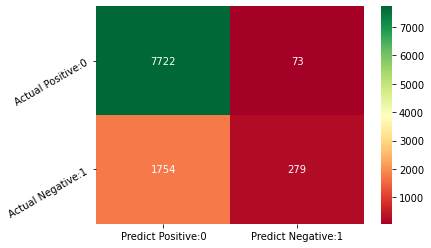

In [78]:
# visualize confusion matrix with seaborn heatmap
CM=confusion_matrix(y_valid, preds)

cm_matrix = pd.DataFrame(data=CM, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.yticks(rotation=30)

In [79]:
# check accuracy score on the alidation data
print(round(accuracy_score(y_valid, preds),4)) 

0.8141


In [80]:
# check precision score on the validation data
print(round(precision_score(y_valid, preds),4)) 

0.7926


In [81]:
# check matthews correlation score on the validation data
print(round(matthews_corrcoef(y_valid,preds),4))

0.2787


# 2. Decision Classifier

In [73]:
# train Decision Tree Classifier on the data
clft = DecisionTreeClassifier(random_state=4,max_depth=8) # use random seed for reproducibility
clft.fit(X_train, y_train)
y_pred=clft.predict(X_valid)

In [74]:
# check confusion matrix on validation data
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

Confusion Matrix:
[[7670  125]
 [1720  313]]


In [79]:
#clft.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 4,
 'splitter': 'best'}

In [106]:
# check accuracy score on the alidation data
print(round(accuracy_score(y_valid, y_pred),4)) 

0.8123


In [107]:
# check precision score on the validation data
print(round(precision_score(y_valid, y_pred),4)) 

0.7146


In [108]:
# check matthews correlation score on the validation data
print(round(matthews_corrcoef(y_valid,y_pred),4))

0.2707


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Positive:1'), Text(0, 1.5, 'Actual Negative:0')])

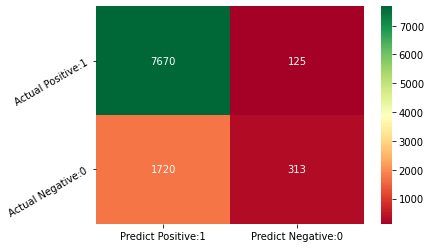

In [109]:
# visualize confusion matrix with seaborn heatmap
CM_d=confusion_matrix(y_valid, y_pred)

cm_matrix = pd.DataFrame(data=CM_d, columns=['Predict Positive:1', 'Predict Negative:0'], index=['Actual Positive:1', 'Actual Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.yticks(rotation=30)

**Feature Importance**

In [110]:
# Feature Importance: Gini Index Importance
sorted_idx_rf = (clft.feature_importances_).argsort()
fig = px.bar(y=X_train.columns[sorted_idx_rf],x=clft.feature_importances_[sorted_idx_rf])

# plot feature importance by using Plotly
fig.update_layout(
    xaxis_title="Gini Index",
    yaxis_title="Production Subsets",
    title_font_color="darkblue",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"))
fig.update_layout(title_text='Feature Importance - Decision Tree', title_x=0.5)
fig.show()

-----